<a href="https://colab.research.google.com/github/PietroMelzi/kaggle/blob/master/titanic/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [10]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
! mv kaggle.json /root/.kaggle

In [12]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 56.6MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.91MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 23.6MB/s]


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [15]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


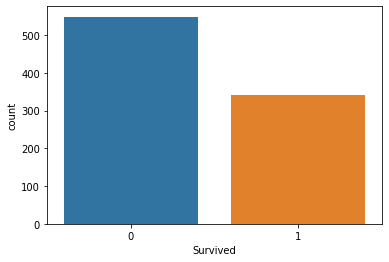

In [18]:
import seaborn as sns
sns.countplot(train_df['Survived'])

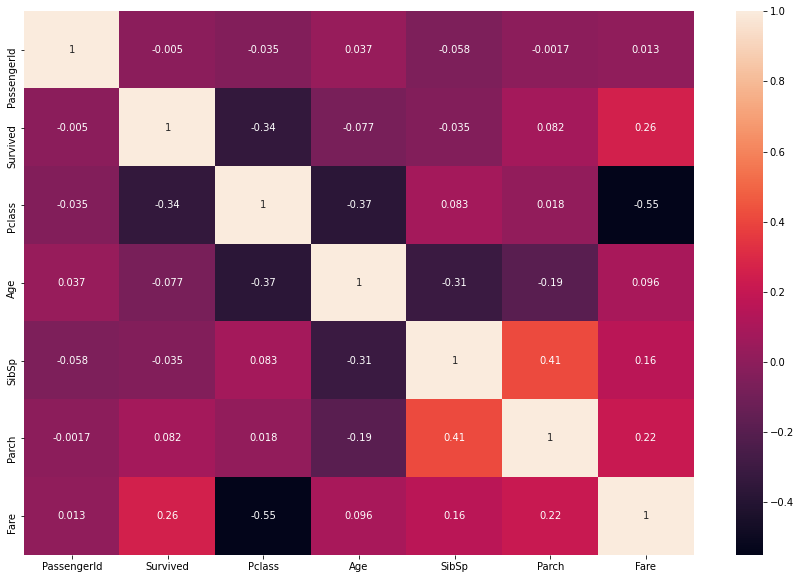

In [19]:
import matplotlib.pyplot as plt

correlation = (train_df.loc[:, train_df.columns]).corr()
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(correlation, annot = True, ax = ax)

In [20]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [0]:
train_df = train_df.drop(['Survived'], axis=1)

In [0]:
train_df['target'] = 0
test_df['target'] = 1
df = pd.concat([train_df, test_df], axis=0)

In [0]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X = df.drop(['target', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
Y = df.target

#param = {'num_leaves': 31, 'objective': 'binary'}
#param['metric'] = 'auc'

#skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
#for train_index, val_index in skf.split(X, Y):
#  X_train, X_val = X.iloc[train_index][:], X.iloc[val_index][:]
#  y_train, y_val = Y.iloc[train_index][:], Y.iloc[val_index][:]
#  train_data = lgb.Dataset(X_train, label=y_train)
#  val_data = lgb.Dataset(X_val, y_val)

#  num_round = 10
#  bst = lgb.train(param, train_data, num_round, valid_sets=[val_data])

#train_data = lgb.Dataset(X, label=Y)
#lgb.cv(param, train_data, num_round, nfold=5)
